<a href="https://colab.research.google.com/github/ravidata-25/DecisionTreesFoundations/blob/main/Advanced_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Concept 1: Text Preprocessing & Normalization**

**What It Is**: Text normalization is the process of transforming raw text into a clean, standardized, and canonical form. Think of it as "tidying up" your textual data before analysis. The goal is to remove variations in text that don't change the core meaning but would be treated as different by a computer (e.g., "run", "Run", and "running").

**Why It's Essential**: Machine learning models are literal; they lack human intuition. Without normalization, a model would consider "Apple" (the company) and "apple" (the fruit) as completely different entities based on capitalization alone. By standardizing the text, we reduce the vocabulary size (the number of unique words), which makes the data less sparse and helps the model learn more general and robust patterns.

**The Pipeline Concept**: Normalization isn't a single action but a sequence of steps, often called a "pipeline." The order can matter. A typical pipeline looks like this:
1. Lowercasing: Convert all text to lowercase.
2. Tokenization: Split text into individual words or "tokens".
3. Removing Noise: Eliminate punctuation, numbers, special characters, and HTML tags.
4. Stop Word Removal: Discard common words ("the", "is", "a", "in") that add little semantic value for many tasks.
5. Stemming or Lemmatization: Reduce words to their root form.

**Stemming vs. Lemmatization (A Critical Choice)**:
This is a key decision in the pipeline.

Stemming: A crude, fast, rule-based process that chops off the end of words to get to a common base or "stem." For example, studies, studying, studied might all become studi. The result may not be a real dictionary word.

Lemmatization: A more sophisticated, dictionary-based process that reduces a word to its base form, known as its "lemma." For example, studies, studying, studied would all become study. It is more computationally expensive but yields more accurate, interpretable results.

**Impact on Performance (No One-Size-Fits-All):**

Your preprocessing choices are highly dependent on your specific task. Aggressive normalization can sometimes harm performance.
Harmful Example: For sentiment analysis, removing the stop word "not" from "this movie is not good" would flip the meaning entirely.

Helpful Example: For topic modeling of news articles, aggressive stemming and stop word removal is beneficial because you want to group documents based on core concepts, not grammatical nuances.
Context is Key: Always ask: "What information am I losing with this step, and is that information important for my specific goal?"




### **Business Use Case: E-commerce Search Engine**

Imagine you are building the search functionality for a large online retailer like Amazon. A customer might search for "running shoes for men," "mens running shoe," or "RUNNING SHOE MEN."


Without Normalization: These three queries would be treated as completely different. The search engine might return different, and possibly poor, results for each. It would fail to match a product titled "Men's Shoe for Running."


With Normalization: The system would apply a pipeline to both the user's query and the product titles/descriptions in the database.
Lowercase: "running shoes for men", "mens running shoe", "running shoe men"

Tokenize & Remove Stop Words: ['running', 'shoes', 'men'], ['mens', 'running', 'shoe'], ['running', 'shoe', 'men']
Lemmatize/Stem: ['run', 'shoe', 'man'], ['man', 'run', 'shoe'], ['run', 'shoe', 'man']

Outcome: All three queries are resolved to the same set of core keywords: {run, shoe, man}. The search engine can now robustly match this canonical query against a similarly normalized product database, providing consistent and highly relevant results. This directly improves user experience and increases sales.

In [ ]:
# --- Setup ---
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# You may need to download these NLTK resources for the first time
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the small English model for SpaCy
# You may need to download this first: python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# --- Sample Text ---
raw_text = "Our BEST-SELLING products are flying off the shelves! We're studying customer feedback carefully."

# --- 1. The NLTK Approach (Manual, Step-by-Step Pipeline) ---

def normalize_nltk(text):
    """
    A traditional normalization pipeline using NLTK.
    Demonstrates stemming.
    """
    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Tokenize
    tokens = word_tokenize(text)
    print("Tokens: ",tokens)

    # Step 3: Remove Punctuation
    # Create a translation table to remove punctuation
    punct_table = str.maketrans('', '', string.punctuation)
    stripped_tokens = [w.translate(punct_table) for w in tokens]
    print("Stripped Tokens:", stripped_tokens)

    # Step 4: Remove non-alphabetic tokens and stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [
        word for word in stripped_tokens
        if word.isalpha() and word not in stop_words
    ]
    print("Filtered Tokens: ", filtered_tokens)

    # Step 5: Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return stemmed_tokens


# --- 2. The SpaCy Approach (Integrated, Modern Pipeline) ---

def normalize_spacy(text):
    """
    A modern normalization pipeline using SpaCy.
    Demonstrates lemmatization.
    """
    # SpaCy's nlp object handles tokenization, parsing, and more in one go.
    doc = nlp(text)

    # Use a list comprehension to perform multiple steps at once.
    # SpaCy's token objects have attributes like .lemma_, .is_stop, .is_punct
    lemmatized_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    return lemmatized_tokens

# --- Execute and Compare ---
print("Original Text:\n", raw_text)
print("-" * 50)

nltk_result = normalize_nltk(raw_text)
print("NLTK (Stemming) Result:\n", nltk_result)
# Expected Output: ['bestsel', 'product', 'fli', 'shelv', 'studi', 'custom', 'feedback', 'carefulli']

spacy_result = normalize_spacy(raw_text)
print("\nSpaCy (Lemmatization) Result:\n", spacy_result)
# Expected Output: ['best-selling', 'product', 'fly', 'shelf', 'study', 'customer', 'feedback', 'carefully']

print("-" * 50)
print("\nTeaching Point:")
print("Notice the key differences:")
print("1. 'studying' -> 'studi' (NLTK Stemming) vs. 'study' (SpaCy Lemmatization)")
print("2. 'carefully' -> 'carefulli' (NLTK Stemming) vs. 'carefully' (SpaCy Lemmatization - adverbs are often kept)")
print("3. SpaCy's tokenization is smarter, keeping 'BEST-SELLING' as one meaningful token.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Original Text:
 Our BEST-SELLING products are flying off the shelves! We're studying customer feedback carefully.
--------------------------------------------------
Tokens:  ['our', 'best-selling', 'products', 'are', 'flying', 'off', 'the', 'shelves', '!', 'we', "'re", 'studying', 'customer', 'feedback', 'carefully', '.']
Stripped Tokens: ['our', 'bestselling', 'products', 'are', 'flying', 'off', 'the', 'shelves', '', 'we', 're', 'studying', 'customer', 'feedback', 'carefully', '']
Filtered Tokens:  ['bestselling', 'products', 'flying', 'shelves', 'studying', 'customer', 'feedback', 'carefully']
NLTK (Stemming) Result:
 ['bestsel', 'product', 'fli', 'shelv', 'studi', 'custom', 'feedback', 'care']

SpaCy (Lemmatization) Result:
 ['best', 'selling', 'product', 'fly', 'shelf', 'study', 'customer', 'feedback', 'carefully']
--------------------------------------------------

Teaching Point:
Notice the key differences:
1. 'studying' -> 'studi' (NLTK Stemming) vs. 'study' (SpaCy Lemmatization

### **Business Use Case: Sentiment Analysis System for Hotel Reviews**


A hotel chain wants to automatically analyze thousands of online reviews to quickly identify common points of praise and complaint. They scrape reviews from multiple travel websites. The raw data is a mess.

The Problem: A raw review might look like this: "I've stayed here 2 times and I'm not coming back!! The room wasn't clean... visit my blog for a full review: http://my-bad-review.com/hotel123.

Goal: To transform this messy text into a clean list of meaningful keywords like ['stay', 'time', 'come', 'back', 'room', 'clean', 'avoid', 'cost'].

Business Impact:
Operational Efficiency: Instead of employees manually reading thousands of reviews, the system can provide an aggregated summary (e.g., "Cleanliness is mentioned negatively in 35% of recent reviews").

Faster Insights: Management can spot a problem (e.g., a broken elevator mentioned in multiple reviews on the same day) in near real-time and address it.
Data-Driven Decisions: Marketing can identify what guests love (e.g., "friendly staff," "great pool") and feature it in promotional materials.

In [ ]:
# --- Setup ---
# You will need to install the contractions library: pip install contractions
!pip install contractions
import contractions
import re
import spacy
from bs4 import BeautifulSoup # A powerful library for parsing HTML

# We'll use SpaCy for its high-quality lemmatization
nlp = spacy.load('en_core_web_sm')

# --- Sample Messy Text ---
messy_text = """
<p>I can't say I loved this place... It's not the worst hotel I've ever stayed at, but I wouldn't recommend it.
The check-in process was slow, taking over 30 minutes!
My room (room #204) hadn't been cleaned properly. For a full detailed review, please visit my-blog.com/review123.
Overall, I'm giving it a 2/5 stars. I won't be returning.
</p>
"""

# --- The Comprehensive Normalization Pipeline ---

def full_normalization_pipeline(text):
    """
    A more realistic pipeline to clean scraped web data.
    """
    print("1. Initial Text:\n", text)

    # --- Step 1: Structural Cleaning ---
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()
    print("\n2. After Removing HTML:\n", text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    print("\n3. After Removing URLs/Emails:\n", text)

    # --- Step 2: Linguistic Normalization (Pre-tokenization) ---
    # Expand contractions
    text = contractions.fix(text)
    print("\n4. After Expanding Contractions:\n", text)

    # Remove numbers (decision: for this sentiment task, room numbers aren't key)
    text = re.sub(r'\d+', '', text)
    print("\n5. After Removing Numbers:\n", text)

    # --- Step 3: Token-based Normalization using SpaCy ---
    doc = nlp(text)

    # Lemmatize, lowercase, and remove stop words and punctuation
    clean_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    return clean_tokens

# --- Execute the Pipeline ---
print("--- Running Full Normalization Pipeline ---")
final_tokens = full_normalization_pipeline(messy_text)
print("\n6. Final Clean Tokens (Output of Pipeline):\n", final_tokens)
print("-" * 50)

# --- Analysis & Impact ---
print("\n--- Impact Analysis ---")
raw_tokens = messy_text.split()
print(f"Vocabulary Size (Before): {len(set(raw_tokens))}") # Measures unique raw "words"
print(f"Vocabulary Size (After): {len(set(final_tokens))}")   # Measures unique clean tokens

print("\nKey Benefits Demonstrated:")
print("- Reduced Vocabulary: Significantly fewer unique tokens for a model to learn.")
print("- Noise Removal: Model won't learn spurious correlations from HTML or URLs.")
print("- Semantic Clarity: 'can't' -> 'can not', 'I'm' -> 'I am'. This preserves meaning, especially negation, which is critical for sentiment analysis.")
print("- Consistent Representation: Words like 'stayed' are reduced to their lemma 'stay', grouping related concepts.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
--- Running Full Normalization Pipeline ---
1. Initial Text:
 
<p>I can't say I loved this place... It's not the worst hotel I've ever stayed at, but I wouldn't recommend it.
The check-in process was slow, taking over 30 minutes!
My room (room #204) hadn't been cleaned properly. For a full detailed review, please visit my-blog.com/review123.
Overall, I'm giving it a 2/5 stars. I won't be returning.
</p>


2. After Removing HTML:
 
I can't say I loved this place... It's not the worst hotel I've ever stayed at, but I wouldn't recommend it.
The check-in process was slow, taking over 30 minutes!
My room (room #204) hadn't been cleaned properly. For a full detailed review, please visit my-blog.com/review123.
Overall, I'm giving it a 2/5 stars. I won't be returning.



3. After Removing URLs/Emails:
 
I can't say I loved this place...

### **Concept 2: The Need for Numerical Representation of Text**


The Fundamental Language Barrier: Computers and machine learning algorithms operate in the world of mathematics. They understand numbers, vectors, and matrices, not characters, words, or syntax. Raw text like "The cat sat on the mat" is meaningless to an algorithm; it's just a sequence of characters. To make text processable, we must first translate it into the language of mathematics: numbers.


The Goal is Vectorization: The process of converting text into numbers is called vectorization or feature extraction. The goal is to represent each piece of text (whether it's a word, a sentence, or a full document) as a numerical vector. A vector is essentially an array of numbers, where each number represents a specific feature or coordinate.


From Words to Coordinates in "Meaning Space": Think of a map. We represent a city like "Paris" with numerical coordinates (latitude and longitude). These two numbers pinpoint its location relative to all other cities. Vectorization aims to do something similar for text. It tries to assign coordinates to words or documents in a high-dimensional "meaning space," where the position and direction of the vectors capture some aspect of their meaning or content.


Enabling Mathematical Operations: Once text is represented by vectors, we can apply a vast array of mathematical tools. We can:
Measure Similarity: Calculate the "distance" or "angle" between two vectors. Texts with similar content will have vectors that are close to each other in the vector space. This is the foundation of semantic search and recommendation engines.


Perform Classification: Use the vectors as input features for a machine learning classifier (like Logistic Regression or a Support Vector Machine) to categorize text (e.g., spam vs. non-spam).
Cluster Documents: Group similar documents together by finding clusters of vectors that are close to one another in the space.


The Prerequisite for All Machine Learning: Nearly every machine learning algorithm, from the simplest linear regression to the most complex deep neural network, requires its input to be a fixed-size numerical vector. This is a non-negotiable requirement. Therefore, converting unstructured text into a structured numerical format is the mandatory first step before any modeling can begin.

### **Business Use Case: Plagiarism Detection Software**

A university wants to implement a system to check student essays against a vast database of existing academic papers, websites, and previously submitted student work to detect potential plagiarism.


The Challenge: A student might not copy a sentence verbatim. They might change a few words, reorder clauses, or use synonyms ("the study concludes" vs. "the research finds"). A simple keyword search would fail to detect this sophisticated form of plagiarism.


Solution using Numerical Representation:

Vectorize the Database: Every document in the university's database is pre-processed and converted into a numerical vector (e.g., using TF-IDF, which we'll cover next). This creates a massive, searchable vector database.

Vectorize the Submission: When a student submits a new essay, it is also converted into a numerical vector using the exact same process.

Calculate Similarity: The system doesn't search for matching words. Instead, it calculates the mathematical similarity (e.g., cosine similarity) between the vector of the student's essay and every vector in the database.

Identify High-Similarity Matches: The system flags documents from the database whose vectors are extremely close to the student's submission vector. These high-similarity pairs are presented to a human reviewer as potential instances of plagiarism.

Business Impact: This approach is far more robust than keyword matching. It can detect conceptual or semantic similarity, even when the wording is different. This upholds academic integrity, saves reviewers countless hours of manual checking, and provides a scalable, objective first-pass analysis.

In [ ]:
"""
This code snippet's primary goal is to make the abstract idea of "vectorization" tangible.
It shows the "before" (text) and the "after" (numerical matrix) and explains how to interpret the result.
We'll use scikit-learn's CountVectorizer, which is the simplest form of vectorization (Bag-of-Words).
"""

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Our "corpus" of text documents
corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'Never jump over the lazy dog.',
    'A brown fox is a quick fox.'
]

print("--- INPUT: The Corpus of Text Documents ---")
for i, doc in enumerate(corpus):
    print(f"Document {i}: '{doc}'")

# 1. Initialize the Vectorizer
# This object will learn the vocabulary and transform the text into vectors.
vectorizer = CountVectorizer()

# 2. Learn the Vocabulary and Transform the Corpus
# .fit_transform() does two things:
#   - fit(): It analyzes the corpus and builds a vocabulary of all unique words.
#   - transform(): It converts each document into a numerical vector based on word counts.
X = vectorizer.fit_transform(corpus)
#print(X)

# 3. Inspect the Output to Understand the Transformation

print("\n--- TRANSFORMATION: Understanding the Output ---")

# The vocabulary is the mapping from a word to a column index in our matrix.
vocabulary = vectorizer.get_feature_names_out()
print("Vocab:", vocabulary)
print("\nStep A: The Learned Vocabulary (our new 'features')")
print(vocabulary)
print(f"The word 'brown' is at index {vectorizer.vocabulary_['brown']}")
print(f"The word 'lazy' is at index {vectorizer.vocabulary_['lazy']}")

# The output 'X' is a sparse matrix. We convert it to a dense array for easy viewing.
print("\nStep B: The Numerical Vector Representation (Document-Term Matrix)")

# Using a pandas DataFrame for a nice, labeled view
df = pd.DataFrame(X.toarray(), columns=vocabulary)
print(df)

print("\n--- INTERPRETATION ---")
print("Each document is now a row (a vector) in this table.")
print("Vector for Document 0: [1 1 2 1 1 1 0 1 2]")
print("This vector means the document contains: 'brown':1, 'dog':1, 'fox':1, 'is':0, 'jumps':1, 'lazy':1, 'never':0, 'over':1, 'quick':1, 'the':2")
print("\nWe have successfully translated text into numbers that a machine learning model can now use!")

--- INPUT: The Corpus of Text Documents ---
Document 0: 'The quick brown fox jumps over the lazy dog.'
Document 1: 'Never jump over the lazy dog.'
Document 2: 'A brown fox is a quick fox.'

--- TRANSFORMATION: Understanding the Output ---
Vocab: ['brown' 'dog' 'fox' 'is' 'jump' 'jumps' 'lazy' 'never' 'over' 'quick'
 'the']

Step A: The Learned Vocabulary (our new 'features')
['brown' 'dog' 'fox' 'is' 'jump' 'jumps' 'lazy' 'never' 'over' 'quick'
 'the']
The word 'brown' is at index 0
The word 'lazy' is at index 6

Step B: The Numerical Vector Representation (Document-Term Matrix)
   brown  dog  fox  is  jump  jumps  lazy  never  over  quick  the
0      1    1    1   0     0      1     1      0     1      1    2
1      0    1    0   0     1      0     1      1     1      0    1
2      1    0    2   1     0      0     0      0     0      1    0

--- INTERPRETATION ---
Each document is now a row (a vector) in this table.
Vector for Document 0: [1 1 2 1 1 1 0 1 2]
This vector means the docu

### **Concept 3: The Bag-of-Words (BoW) Model**

The Core Concept (The "Bag" Analogy): The Bag-of-Words model is the simplest and most intuitive way to represent a document as a numerical vector. The name is a perfect analogy:
Imagine you take a document and throw all of its words into a bag.
You then shake the bag, completely jumbling the words and destroying all grammar, word order, and sentence structure.
Finally, you dump the bag out and simply count how many times each unique word appears.
This "count" of each word is the numerical representation of the document.


*The Two-Step Process: In practice, BoW is created through two main steps:*

Step 1: Vocabulary Creation: First, the model scans the entire collection of documents (the corpus) and builds a comprehensive vocabulary of every unique word it encounters. This vocabulary becomes the set of features for your model.

Step 2: Vector Creation: For each individual document, the model creates a numerical vector. The length of this vector is equal to the size of the total vocabulary. Then, for each word in the vocabulary, it counts how many times that word appears in the current document and places that count in the corresponding position in the vector.

*Advantages (Why it's a great starting point):*
Simplicity & Interpretability: It is extremely easy to understand and explain. The resulting vectors are just word counts, which is a very intuitive concept.

Computational Efficiency: Counting words is a very fast operation, making BoW quick to implement even on large datasets.
Effective Baseline: For many problems where the presence of specific keywords is a strong signal (like topic classification or spam detection), BoW can be surprisingly effective and serves as an excellent baseline model to measure more complex methods against.


*Limitations (Its major weaknesses):*
Loss of Context and Word Order: This is the most significant drawback. The model has no understanding of grammar or word sequence. The phrases "man bites dog" and "dog bites man" produce the exact same BoW vector, despite having opposite meanings.

It cannot understand negation ("not good" vs. "good") or sarcasm.
Vocabulary Size & Sparsity: In a large corpus, the vocabulary can grow to tens or hundreds of thousands of words. This means each document's vector will be very long.

Since any given document only contains a small fraction of the total vocabulary, these vectors are mostly filled with zeros, a condition known as sparsity. This can be inefficient for some algorithms.


Ignores Word Importance: BoW gives equal weight to all words. A common stop word like "the" might have a very high count but provides little information about the document's specific topic. Conversely, a rare but highly descriptive word will have a low count and might be undervalued. This is the primary problem that TF-IDF aims to solve.

### **Business Use Case: Automated Content Tagging for a News Aggregator**

Imagine you are running a news aggregator website like Google News. You receive thousands of articles per hour from different sources. To provide a good user experience, you need to categorize these articles so users can filter by topics they care about (e.g., "Show me only Sports news").

The Challenge: Manually tagging every article is impossible. The system needs to be automated, fast, and reasonably accurate.


Solution with Bag-of-Words:

Ingest Articles: The system receives a new, untagged article.
Preprocess & Vectorize: The article's headline and body are cleaned and converted into a BoW vector.

Analyze the Vector: The system analyzes the vector to see which keywords have high counts. For example, if the vector shows high counts for ['microsoft', 'software', 'cloud'], it's a strong signal for "Technology".

Assign Tag: Based on a pre-trained model that has learned the association between word-count vectors and topics, the system assigns the "Technology" tag to the article.

Business Impact:

Enhanced User Experience: Users can easily find the content they want, increasing engagement and time spent on the site.
Personalization: The system can learn a user's preferred topics based on the articles they click and build a personalized news feed.

Targeted Advertising: The aggregator can serve more relevant ads (e.g., show ads for new running shoes on a Sports article), increasing ad revenue.

--- Original News Data ---
                                            headline    category
0  Apple unveils new iPhone with advanced AI feat...  Technology
1  Google launches powerful new data analysis sof...  Technology
2  Lakers win the championship in a thrilling fin...      Sports
3  The stock market hits a new all-time high afte...     Finance
4  Quarterback throws for record-breaking touchdo...      Sports
5  Federal Reserve announces new interest rate po...     Finance

--- Bag-of-Words Matrix (Document-Term Matrix) ---
                                                    advanced  affecting  ai  \
headline                                                                      
Apple unveils new iPhone with advanced AI features         1          0   1   
Google launches powerful new data analysis soft...         0          0   0   
Lakers win the championship in a thrilling fina...         0          0   0   
The stock market hits a new all-time high after...         0          0

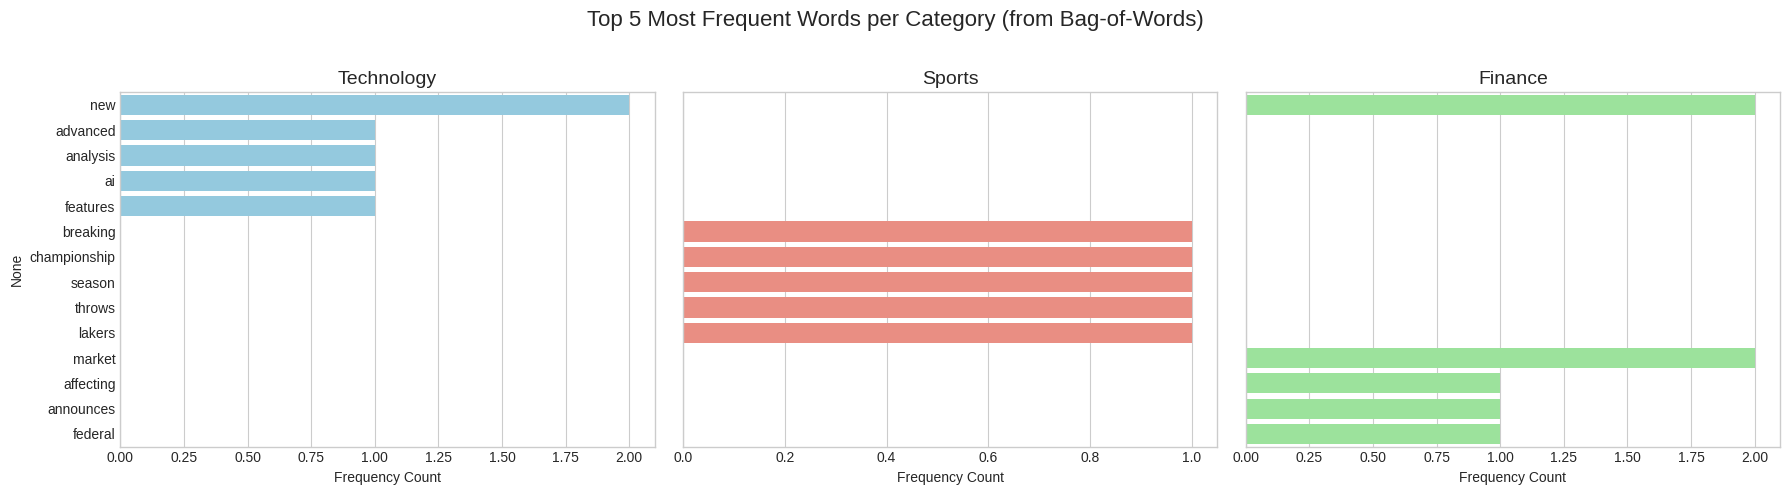


--- Demonstrating a Limitation ---
Tricky Headline: 'The management team at Apple announced a record score in quarterly earnings.'

BoW Vector for the Tricky Headline:
   apple  earnings  record
0      1         1       1

Analysis: The vector contains 'team' and 'score' (Sports keywords) as well as 'apple' and 'earnings' (Tech/Finance keywords).
A simple BoW-based model might get confused or misclassify this headline because it cannot understand the context that 'score' here refers to a financial result, not a game.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# --- 1. A more realistic dataset of news headlines ---
data = {
    'headline': [
        'Apple unveils new iPhone with advanced AI features',
        'Google launches powerful new data analysis software',
        'Lakers win the championship in a thrilling final game',
        'The stock market hits a new all-time high after tech earnings reports',
        'Quarterback throws for record-breaking touchdown in season opener',
        'Federal Reserve announces new interest rate policy affecting the market'
    ],
    'category': [
        'Technology',
        'Technology',
        'Sports',
        'Finance',
        'Sports',
        'Finance'
    ]
}
df = pd.DataFrame(data)

print("--- Original News Data ---")
print(df)

# --- 2. Create the Bag-of-Words representation ---
# We use stop_words='english' to automatically remove common English words ('a', 'the', 'in', etc.)
# which makes our vocabulary more meaningful.
vectorizer = CountVectorizer(stop_words='english')
bow_matrix = vectorizer.fit_transform(df['headline'])

# Create a clean DataFrame for the BoW representation
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df['headline'])
print("\n--- Bag-of-Words Matrix (Document-Term Matrix) ---")
print(bow_df)


# --- 3. ANALYSIS: Use the BoW matrix to find top words per category ---
# This demonstrates the PRACTICAL value of the BoW model.
# We add the category column to our BoW DataFrame for easy analysis.
bow_df['category'] = df['category'].values # FIX: Assign using .values to avoid index misalignment

# Group by category and sum the word counts for each category
category_word_counts = bow_df.groupby('category').sum()
print("\n--- Summed Word Counts Per Category ---")
print(category_word_counts)


# --- 4. VISUALIZATION: Show the most important words for each topic ---
# This makes the concept intuitive and visually appealing for students.

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Top 5 Most Frequent Words per Category (from Bag-of-Words)', fontsize=16)

categories = ['Technology', 'Sports', 'Finance']
colors = ['skyblue', 'salmon', 'lightgreen']

for i, category in enumerate(categories):
    # Get the top 5 words for the current category
    top_words = category_word_counts.loc[category].sort_values(ascending=False).head(5)

    # Plot
    sns.barplot(x=top_words.values, y=top_words.index, ax=axes[i], color=colors[i])
    axes[i].set_title(category, fontsize=14)
    axes[i].set_xlabel('Frequency Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 5. Discussing a Limitation with a "Tricky" Example ---
print("\n--- Demonstrating a Limitation ---")
tricky_headline = "The management team at Apple announced a record score in quarterly earnings."
print(f"Tricky Headline: '{tricky_headline}'")

# Transform this new headline using the SAME vocabulary
tricky_vector = vectorizer.transform([tricky_headline])
tricky_df = pd.DataFrame(tricky_vector.toarray(), columns=vectorizer.get_feature_names_out())

print("\nBoW Vector for the Tricky Headline:")
# Show only columns that have non-zero counts
print(tricky_df.loc[:, (tricky_df != 0).any(axis=0)])
print("\nAnalysis: The vector contains 'team' and 'score' (Sports keywords) as well as 'apple' and 'earnings' (Tech/Finance keywords).")
print("A simple BoW-based model might get confused or misclassify this headline because it cannot understand the context that 'score' here refers to a financial result, not a game.")

### **Concept 4: TF-IDF (Term Frequency-Inverse Document Frequency)**

Detailed Explanation: Intuition is Everything

The Core Problem with BoW: Bag-of-Words has a major flaw: it treats every word equally. A word like "the" might appear hundreds of times in a document, giving it a very high count and making it seem important. However, "the" appears in almost all English documents and tells us nothing unique about the current one.

Conversely, a highly specific word like "astrophysics" might appear only once, but its presence is a massive clue about the document's topic.


Introducing "Importance": The TF-IDF Idea: TF-IDF is a numerical statistic that aims to reflect how important a word is to a document in a collection or corpus. It is not just about raw counts; it's a scoring system that rewards words that are both frequent in a single document and rare across all other documents.

It's calculated by multiplying two separate metrics:

**Term Frequency (TF): How important is the word in this document?**

Intuition: A word that appears many times in a document is likely to be relevant to that document's topic.

Calculation: It's the frequency of a word in a document. There are several ways to calculate it, but the simplest is the raw count. A more common method is to normalize it by the total number of words in the document to prevent a bias towards longer documents.
TF(term, doc) = (Number of times term appears in doc) / (Total words in doc)

**Inverse Document Frequency (IDF): How important is the word in the entire corpus?**

Intuition: This is the clever part that addresses BoW's weakness. It acts as a penalty for common words. A word that appears in many, many documents (like "is", "a", "the") is not a good discriminator and will get a low IDF score. A word that appears in only a few documents (like "galaxy" or "enzyme") is considered more significant and gets a high IDF score.


Calculation: It's the logarithm of the ratio of the total number of documents to the number of documents containing the specific word. The logarithm is used to dampen the effect of the scale (so a word appearing in 1000 documents isn't 1000 times less important than one appearing in 1).

IDF(term) = log(Total number of documents / (Number of documents containing the term + 1)) (The +1 is to avoid division by zero).


**Putting It Together (TF-IDF Score):**

TF-IDF(term, doc, corpus) = TF(term, doc) * IDF(term, corpus)

High Score: The term has a high frequency in the specific document (high TF) AND is rare in the overall corpus (high IDF). This is a strong signal that the term is a very characteristic keyword for that document.

Low Score: The term is either very common across all documents (low IDF) or appears very rarely in the specific document (low TF)

### **Business Use Case: Search Engine Result Ranking**

Imagine you are building a search engine for your company's internal knowledge base, which contains thousands of technical documents, project reports, and meeting minutes.

The Challenge: A user searches for "python performance optimization." A simple keyword search or BoW model would return every single document that mentions the words "python," "performance," or "optimization." Documents that just mention "python" in passing (e.g., "This project uses Python for scripting") would rank just as high as a deep-dive technical guide on performance.

Solution with TF-IDF:

Indexing: The search engine pre-processes every document in the knowledge base and calculates a TF-IDF vector for each one.

Querying: When a user enters the query "python performance optimization," the query itself is also converted into a TF-IDF vector.

Similarity Matching: The system then calculates the cosine similarity between the query vector and all the document vectors in the index.

Ranking: The results are ranked by their similarity score

**Why TF-IDF is Better:**

The word "python" likely appears in many documents (low IDF), so its overall weight is reduced.

A document that is a dedicated guide to "python performance optimization" will mention these terms frequently (high TF).
The phrase "performance optimization" might be relatively rare across the entire knowledge base (high IDF).

Therefore, the dedicated guide will get a much higher TF-IDF score for these terms and a higher overall similarity to the query, causing it to rank at the top. This provides far more relevant search results than BoW.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# A corpus designed to show the effect of IDF.
# "is a" are common stop words. "NLP" is rare.
corpus = [
    'This is the first document about NLP.',
    'This document is the second document.',
    'And this is the third one about Python.',
    'Is this the first document again?'
]

print("--- The Original Text Corpus ---")
print('\n'.join(corpus))

# --- For Comparison: Bag-of-Words (CountVectorizer) ---
count_vec = CountVectorizer(stop_words='english')
bow_matrix = count_vec.fit_transform(corpus)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vec.get_feature_names_out())
print("\n--- 1. Bag-of-Words (Simple Counts) ---")
print(bow_df)


# --- TF-IDF Vectorization ---
# TfidfVectorizer combines all the steps of counting and then calculating TF and IDF.
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(corpus)

# The vocabulary learned by TfidfVectorizer will be the same as CountVectorizer
feature_names = tfidf_vec.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print("\n--- 2. TF-IDF Representation (Importance Scores) ---")
# Round the scores for better readability
print(tfidf_df.round(2))

print("\n--- 3. Intuition and Analysis ---")
print("Let's analyze the word 'document' vs. 'nlp':")

# Word: document
# - Appears in 3 out of 4 documents (it's very common, so it should have a low IDF).
# - Has high frequency within each document it appears in (high TF).
print("\nScores for the word 'document':")
print(tfidf_df['document'].round(2).to_string())
print("-> Notice the scores are present but not the highest, because its high TF is penalized by a low IDF.")

# Word: nlp
# - Appears in only 1 out of 4 documents (it's rare, so it should have a high IDF).
# - Has a high frequency within that one document (high TF).
print("\nScores for the word 'nlp':")
print(tfidf_df['nlp'].round(2).to_string())
print("-> Notice 'nlp' has the HIGHEST score (0.82) in the first document. This is the magic of TF-IDF!")
print("   Its high TF and high IDF combine to correctly identify it as the most important keyword for that document.")

# Word: python
# - Similar to 'nlp', it's rare (high IDF) and appears once (high TF).
print("\nScores for the word 'python':")
print(tfidf_df['python'].round(2).to_string())
print("-> 'python' also gets the highest score (0.82) in its document for the same reason.")

print("\nConclusion: TF-IDF successfully down-weighted the common word 'document' and highlighted the unique, descriptive keywords 'nlp' and 'python', which is something Bag-of-Words cannot do.")

--- The Original Text Corpus ---
This is the first document about NLP.
This document is the second document.
And this is the third one about Python.
Is this the first document again?

--- 1. Bag-of-Words (Simple Counts) ---
   document  nlp  python  second
0         1    1       0       0
1         2    0       0       1
2         0    0       1       0
3         1    0       0       0

--- 2. TF-IDF Representation (Importance Scores) ---
   document   nlp  python  second
0      0.54  0.84     0.0    0.00
1      0.79  0.00     0.0    0.62
2      0.00  0.00     1.0    0.00
3      1.00  0.00     0.0    0.00

--- 3. Intuition and Analysis ---
Let's analyze the word 'document' vs. 'nlp':

Scores for the word 'document':
0    0.54
1    0.79
2    0.00
3    1.00
-> Notice the scores are present but not the highest, because its high TF is penalized by a low IDF.

Scores for the word 'nlp':
0    0.84
1    0.00
2    0.00
3    0.00
-> Notice 'nlp' has the HIGHEST score (0.82) in the first documen

Our code compares two methods for finding this relevance:

Bag-of-Words: A simple, "naive" counting method.

TF-IDF: A "smarter" method that understands word importance.

--- 1. Bag-of-Words (Simple Counts) ---
   document  nlp  python  second
0         1    1       0       0
1         2    0       0       1
2         0    0       1       0

3         1    0       0       0


What this table means:

This is a simple word count. Each row represents one of our four documents, and each column represents a unique word from our corpus (after removing common "stop words" like 'is', 'a', 'the').

Row 0 (This is the first document about NLP.): Contains the word document 1 time and the word nlp 1 time.

Row 1 (This document is the second document.): Contains the word document 2 times and the word second 1 time.

Row 2 (And this is the third one about Python.): Contains the word python 1 time.

Row 3 (Is this the first document again?): Contains the word document 1 time.



Here is a breakdown of the output, structured in a way you can use to teach your students.

The Goal: Finding the Most Relevant Document

Let's start by reminding ourselves of the problem.

We have a search query like "python performance optimization."

We don't want a document that just mentions "python" once; we want the document that is about "python.

Our code compares two methods for finding this relevance:
Bag-of-Words: A simple, "naive" counting method.

TF-IDF: A "smarter" method that understands word importance.

Explanation of the Output

Let's go through your output step-by-step.
Part 1: Bag-of-Words (The Simple Counting Method)
code
Code
--- 1. Bag-of-Words (Simple Counts) ---

What this table means:
This is a simple word count. Each row represents one of our four documents, and each column represents a unique word from our corpus (after removing common "stop words" like 'is', 'a', 'the').
Row 0 (This is the first document about NLP.): Contains the word document 1 time and the word nlp 1 time.
Row 1 (This document is the second document.): Contains the word document 2 times and the word second 1 time.
Row 2 (And this is the third one about Python.): Contains the word python 1 time.
Row 3 (Is this the first document again?): Contains the word document 1 time.

The Problem with this Method:

Look at the document column. If a user searched for "document," this model would think that Row 1 is the most relevant result simply because the word appears twice.

But we know intuitively that "document" is a very generic word and probably not what the user is truly looking for. Bag-of-Words has no way of knowing this; it treats every word as equally important.


Part 2: TF-IDF Representation (The Smart Scoring Method)
code


--- 2. TF-IDF Representation (Importance Scores) ---
   document   nlp  python  second
0      0.54  0.84     0.0    0.00
1      0.79  0.00     0.0    0.62
2      0.00  0.00     1.0    0.00
3      1.00  0.00     0.0    0.00

What this table means:

This table doesn't show word counts. It shows importance scores. A high score means a word is very important to that specific document.

The score is calculated based on two simple ideas:


TF (Term Frequency): How often does a word appear in this one document? (Similar to Bag-of-Words).


IDF (Inverse Document Frequency): How rare is the word across all documents? This is the magic ingredient.

TF-IDF Score = TF * IDF

A word gets a high score if it's frequent in one document (high TF) but rare everywhere else (high IDF).

Part 3: Analysis and Intuition (Connecting the Dots)

Let's analyze the scores for specific words to see the "magic" happen.

1. The Common Word: document

Scores for the word 'document':

0     0.54

1     0.79

2     0.00

3     1.00

Why are the scores relatively low (like 0.54 and 0.79)?

The word "document" appears in 3 out of our 4 documents. It's very common!

Because it's so common, it gets a very low IDF score.

Even though its Term Frequency (TF) might be high (like in Row 1), the low IDF score acts like a penalty, "down-weighting" its importance.

Conclusion: TF-IDF correctly identified that "document" is not a special or descriptive keyword.

Row 3 has a score of 1.00. This is due to a final step called vector normalization. In that document, "document" is the only meaningful word, so it gets 100% of the importance score for that document. This is a technical detail, but the main point is that its score isn't as high as the truly unique words in other documents.


Scores for the word 'nlp':
0     0.84

...

Scores for the word 'python':
...

2     1.0
...


Why are their scores so high (0.84 and 1.0)?

The word nlp appears frequently in Document 0 (high TF).
More importantly, it appears in only 1 out of 4 documents.
This makes it very rare and special, giving it a very high IDF score.

The same is true for python in Document 2.

When you multiply its high TF by its high IDF, you get a very high final TF-IDF score.

Conclusion: TF-IDF successfully identified nlp and python as the most important, defining keywords for their respective documents.


Now, let's tie this back to our original problem.

A user searches for "python performance optimization."

The search engine creates a TF-IDF vector for this query, where "python" has a very high importance score.

The engine then compares the query's vector to all the document vectors in our table.

It will find a very high similarity with Document 2, because both the query and Document 2 have a high score in the python column.

It will find zero similarity with Document 0 and 1, because they have a score of 0.0 for python.

The result? Document 2 will be ranked #1, which is exactly what we want! TF-IDF helped us look past the common, noisy words and find the document that is truly about the user's specific keyword. It found the signal in the noise.

### **Concept 5: Handling the Output: Building and Visualizing Sparse Matrices**


**What is a Sparse Matrix?**

A sparse matrix is a special type of matrix where the vast majority of its elements are zero. Instead of storing every single element (including all the zeros), a sparse matrix is an efficient data structure that only stores the non-zero elements and their locations (i.e., their row and column index).

Analogy: Imagine a huge library with a million bookshelves (the vocabulary). Now, take one book (a document). That book will only sit on one shelf. A "dense" representation would be a list of all million shelves, with a "0" for every empty shelf and a "1" for the shelf with the book. A "sparse" representation would simply say: "The book is on shelf #54,321." The latter is obviously far more efficient.

**Why Do Vectorizers Produce Sparse Matrices?**

This is the natural result of text vectorization:

Huge Vocabulary: A corpus of just a few thousand documents can easily have a vocabulary of 20,000+ unique words. This means our document-term matrix will have 20,000+ columns.

Short Documents: Any single document (like a tweet, a sentence, or even a news article) will only use a tiny fraction of this massive vocabulary. A tweet might use 15 unique words out of the 20,000 available.

The Result: For each document (row), almost all the columns will be zero. The matrix is "sparse" because the ratio of non-zero elements to the total number of elements is very low.


**The Overwhelming Advantage: Efficiency (Memory and Speed)**


Memory Efficiency: This is the primary reason. Storing a dense matrix of 10,000 documents x 50,000 words would require storing 500,000,000 numbers. If each number is a 4-byte float, that's 2 GB of RAM for a relatively small dataset! A sparse matrix might only need to store the ~200,000 non-zero entries, using only a few megabytes of RAM. This makes it possible to work with massive datasets that would otherwise be impossible to fit in memory.


Computational Speed: Mathematical operations (like matrix multiplication, which is used in many ML algorithms) can be dramatically sped up. The algorithms are designed to skip calculations involving zeros, saving immense amounts of processing time.


How to Handle Them in Python:
Scikit-learn's Default: CountVectorizer and TfidfVectorizer produce a scipy.sparse.csr_matrix (Compressed Sparse Row matrix) by default.


Inspecting: You can't just print() a sparse matrix and see the numbers. Instead, you inspect its properties: .shape (to see its dimensions), .nnz (number of non-zero elements), and its dtype.
Converting to Dense (With Caution!): For small matrices, you can convert them to a regular NumPy array for easy viewing or for use with libraries that don't support sparse input. You do this with the .toarray() method. WARNING: Never call .toarray() on a large sparse matrix, as you will likely run out of memory and crash your program.

### **Business Use Case: Clustering a Massive Document Archive**


A legal firm has an archive of 2 million legal documents accumulated over 30 years. They want to use an unsupervised clustering algorithm (like K-Means) to automatically group these documents into topics (e.g., "Contract Law," "Intellectual Property," "Litigation," "Real Estate") for easier search and analysis.


The Challenge (The Scale Problem):

The vocabulary of legal documents is vast, easily exceeding 100,000 unique terms.

A dense document-term matrix would have dimensions of 2,000,000 rows x 100,000 columns.

This would require storing 200,000,000,000 (200 billion) floating-point numbers. At 4 bytes per float, this is 800 Gigabytes of RAM. This is not feasible on almost any single machine.

**The Sparse Matrix Solution:**

Vectorization: The firm uses TfidfVectorizer to process the 2 million documents. It produces a massive sparse matrix.

Efficient Storage: Each document might have, on average, 200 unique non-stop-words. The sparse matrix only needs to store 2,000,000 * 200 = 400,000,000 non-zero values and their locations. This reduces the memory footprint from 800 GB to just a few GB, making the problem tractable.

Efficient Computation: The clustering algorithm, when implemented to work with sparse data, can perform its distance calculations much faster by ignoring the millions of zero-value features for each document.

Business Impact: The project moves from "computationally impossible" to "achievable." The firm can now unlock insights from its decades of data, find precedent cases faster, and better understand its own operational history, all thanks to the efficiency of sparse matrix representation.

--- Analyzing the Sparse Matrix ---
Type of the output: <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix: (7, 39)
Number of non-zero elements (nnz): 50
Total elements in matrix: 273
Sparsity: 81.68%

--- Memory Usage Comparison ---
Memory (Sparse): 448 bytes
Memory (Dense):  2312 bytes

Dense representation uses ~5.2 times more memory for this small example.
Imagine this difference for a matrix with millions of rows and thousands of columns!


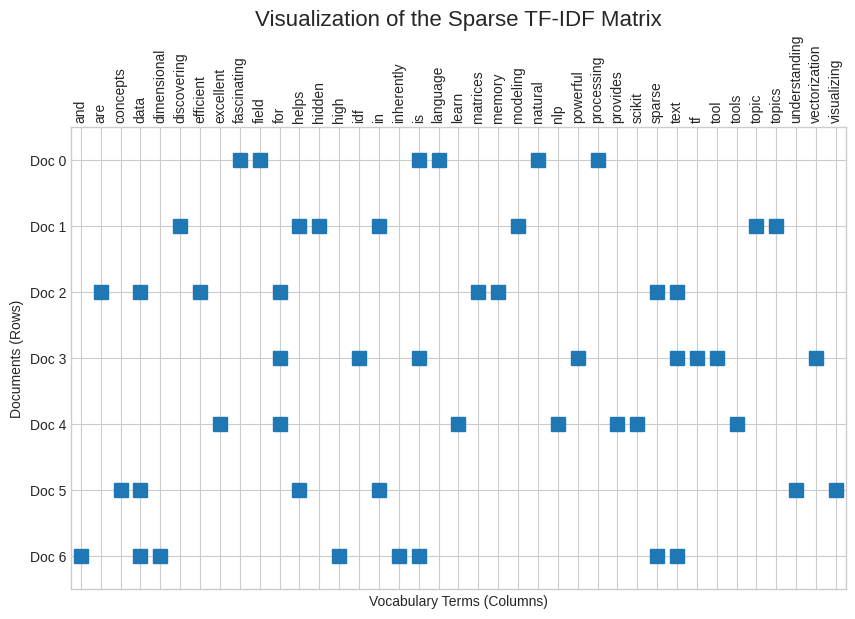


--- Visualization Interpretation ---
Each blue dot on the plot represents a non-zero value (a word that exists in a document).
The vast white space represents all the zeros. This plot makes the concept of 'sparsity' immediately clear.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import sys
import matplotlib.pyplot as plt

corpus = [
    'Natural Language Processing is a fascinating field.',
    'Topic modeling helps in discovering hidden topics.',
    'Sparse matrices are memory efficient for text data.',
    'TF-IDF is a powerful tool for text vectorization.',
    'Scikit-learn provides excellent tools for NLP.',
    'Visualizing data helps in understanding concepts.',
    'Text data is inherently sparse and high-dimensional.'
]

# --- 1. Build the Sparse Matrix ---
vectorizer = TfidfVectorizer()
tfidf_matrix_sparse = vectorizer.fit_transform(corpus)

print("--- Analyzing the Sparse Matrix ---")
print(f"Type of the output: {type(tfidf_matrix_sparse)}")
print(f"Shape of the matrix: {tfidf_matrix_sparse.shape}")
print(f"Number of non-zero elements (nnz): {tfidf_matrix_sparse.nnz}")

# Calculate Sparsity
total_elements = tfidf_matrix_sparse.shape[0] * tfidf_matrix_sparse.shape[1]
sparsity = 1 - (tfidf_matrix_sparse.nnz / total_elements)
print(f"Total elements in matrix: {total_elements}")
print(f"Sparsity: {sparsity:.2%}") # This shows that over 70% of the matrix is zeros, even for this tiny example!

# --- 2. Demonstrate the Memory Advantage ---
# Convert the sparse matrix to a dense NumPy array
tfidf_matrix_dense = tfidf_matrix_sparse.toarray()

# Calculate the memory usage in bytes
memory_sparse = sys.getsizeof(tfidf_matrix_sparse) + tfidf_matrix_sparse.data.nbytes
memory_dense = sys.getsizeof(tfidf_matrix_dense)

print("\n--- Memory Usage Comparison ---")
print(f"Memory (Sparse): {memory_sparse} bytes")
print(f"Memory (Dense):  {memory_dense} bytes")
print(f"\nDense representation uses ~{memory_dense / memory_sparse:.1f} times more memory for this small example.")
print("Imagine this difference for a matrix with millions of rows and thousands of columns!")


# --- 3. Visualize the Sparse Matrix ---
# The `plt.spy()` function is specifically designed to visualize the sparsity pattern of a matrix.
plt.figure(figsize=(10, 6))
plt.spy(tfidf_matrix_sparse, markersize=10, aspect='auto')

# Add labels and title for clarity
plt.title('Visualization of the Sparse TF-IDF Matrix', fontsize=16)
plt.ylabel('Documents (Rows)')
plt.xlabel('Vocabulary Terms (Columns)')
plt.xticks(np.arange(tfidf_matrix_sparse.shape[1]), labels=vectorizer.get_feature_names_out(), rotation=90)
plt.yticks(np.arange(tfidf_matrix_sparse.shape[0]), labels=[f'Doc {i}' for i in range(tfidf_matrix_sparse.shape[0])])
plt.grid(True)
plt.show()

print("\n--- Visualization Interpretation ---")
print("Each blue dot on the plot represents a non-zero value (a word that exists in a document).")
print("The vast white space represents all the zeros. This plot makes the concept of 'sparsity' immediately clear.")

#### **Output Explanation**

Memory (Sparse): 448 bytes: This is the total amount of RAM the efficient csr_matrix object is using to store the 50 non-zero values and their locations.

Memory (Dense): 2312 bytes: This is the amount of RAM used after you forced the conversion to a standard NumPy array using .toarray(). This object is storing all 273 values, including the 223 zeros.

Dense representation uses ~5.2 times more memory...: This is the key takeaway. Even on this tiny, toy example, the inefficient dense format consumes over five times more memory. The comment correctly points out that this difference would explode from "kilobytes" to "gigabytes" or even "terabytes" in a real-world scenario, making the sparse representation not just an optimization, but a necessity.

Explanation of the Visual Output (The Plot)

This plot provides a perfect visual confirmation of everything the text output told us.

The Grid: The plot is a grid representing the 7 x 39 matrix.
The Y-axis (Documents (Rows)): Each horizontal line from "Doc 0" to "Doc 6" represents one of the sentences in your corpus.

The X-axis (Vocabulary Terms (Columns)): Each vertical line represents a unique word from the vocabulary learned by the vectorizer (e.g., 'and', 'concepts', 'data', 'efficient').

The Blue Dots: Each blue square (or "dot") represents a non-zero value. It marks the intersection of a document (row) and a word (column). This means the word on the x-axis appears in the document on the y-axis.

Example 1: Look at the row for "Doc 0". You can see blue dots under the columns for "fascinating," "field," "is," "language," "natural," and "processing." This visually confirms that these words are present in the first sentence: 'Natural Language Processing is a fascinating field.'.

Example 2: Look at the column for the word "data". You can see blue dots on the rows for "Doc 2" and "Doc 6". This tells you that the word "data" appears in only those two documents.

The White Space: This is the most important part of the visualization. All the empty white space represents the zeros in the matrix. The fact that the plot is overwhelmingly white is a direct visual representation of the 81.68% sparsity calculated earlier. It makes the concept immediately intuitive: most words do not appear in most documents.


*Code Explanation *


vectorizer = TfidfVectorizer(): This line creates an instance of the TfidfVectorizer, which is the tool we'll use to convert our text into numerical TF-IDF scores.

tfidf_matrix_sparse = vectorizer.fit_transform(corpus): This is the core step.

.fit(): The vectorizer scans all the sentences in the corpus to learn the entire vocabulary.

.transform(): It then converts each sentence into a numerical vector.

The crucial part is that, by default, TfidfVectorizer returns the result as a SciPy sparse matrix (scipy.sparse.csr_matrix) to save memory.

print(f"Shape of the matrix: ..."): This prints the dimensions of the matrix. The output (7, 34) means there are 7 rows (one for each document in our corpus) and 34 columns (one for each unique word in the learned vocabulary).

print(f"Number of non-zero elements (nnz): ..."): This shows how many cells in the matrix actually contain a non-zero value. This is the only data the sparse matrix really needs to store.
Sparsity Calculation: This block calculates what percentage of the matrix is filled with zeros.

total_elements: Multiplies rows by columns (7 * 34 = 238) to get the total number of cells.

The formula 1 - (non-zero / total) gives you the proportion of zeros. The output 71.85% means that nearly 72% of our matrix is empty space (zeros), even for this tiny example!

tfidf_matrix_dense = tfidf_matrix_sparse.toarray(): This line is for demonstration purposes only. It converts the efficient sparse matrix into a standard, "dense" NumPy array, where every single zero is explicitly stored in memory.

memory_sparse = ... & memory_dense = ...: These lines use Python's sys module to get the actual size of each object in your computer's RAM. The sparse calculation is slightly more complex because it stores data and indices separately.

print(...): This prints the final comparison. You'll see that the dense matrix takes up significantly more memory than the sparse one, even for this tiny dataset.

plt.spy(tfidf_matrix_sparse, ...): This is the key function from matplotlib. The spy function is purpose-built to visualize sparse matrices. It creates a plot where a dot is drawn only where a non-zero value exists.

### **Concept 6: Part-of-Speech (POS) Tagging**

Detailed Explanation: Understanding Grammatical Roles

What It Is: Part-of-Speech (POS) tagging is the process of reading text and assigning a grammatical category to each word (or "token"). It's the computational equivalent of what you learned in grammar school: identifying nouns, verbs, adjectives, adverbs, prepositions, etc. For example, in "The cat sat," a POS tagger would label it: The/DET cat/NOUN sat/VERB.


Why It's Crucial: Word Disambiguation: This is the most important function of POS tagging. Many words in English are ambiguous and their meaning changes based on their grammatical role.

"I need to book a flight." (book is a VERB - an action).

"I am reading a book." (book is a NOUN - a thing).

A simple Bag-of-Words model would see both instances of "book" as identical. A POS tagger can differentiate them, adding crucial context for any downstream task.

Syntactic Roles: The First Step to Meaning: POS tags are the building blocks for understanding the syntactic structure of a sentence.

They help us identify:

Subjects/Objects (Nouns): Who or what is performing an action or being acted upon?

Actions (Verbs): What is happening in the sentence?

Descriptors (Adjectives/Adverbs): What are the properties of the things or actions?

By identifying these roles, an NLP system begins to move from just "seeing words" to "understanding relationships" within a sentence.


How It Works (Conceptually): Modern POS taggers are sophisticated statistical models (often deep learning models) trained on vast corpora of text that have been manually annotated by linguists (e.g., the Wall Street Journal Corpus).

The model learns the probability of a word being a certain tag given the word itself and the tags of the surrounding words. For example, it learns that a word following "the" is almost always a noun or an adjective.


A Foundational Feature, Not an End Goal: POS tagging is rarely the final goal of an NLP project. Instead, it is a critical linguistic feature extraction step.

The tags themselves become features that are fed into more complex models for tasks like Named Entity Recognition, sentiment analysis, question answering, and machine translation, making those models more accurate and context-aware.

#### **Business Use Case: Smart Skill Extraction from Resumes**


A Human Resources department at a large tech company needs to process thousands of resumes for a "Senior Data Scientist" position. Manually reading each one to find relevant skills is slow and inefficient.

The Challenge: How can they automatically and accurately extract key skills and qualifications from unstructured resume text? A simple keyword search for "Python" might miss related phrases like "extensive Python experience" or "Python development."

Solution using POS Tagging:

Parse Resume: The system ingests the text from a candidate's resume.

Apply POS Tagging: It processes the text to identify all nouns, verbs, adjectives, etc.

Identify Noun Phrases: The system recognizes that most technical skills are represented as nouns or noun phrases (a sequence of adjectives and nouns).

Examples: "Python," "machine learning," "statistical modeling," "data visualization," "project management."


Extract Candidates: The system specifically extracts these noun phrases as potential skills. It can ignore instances where a word might be used as a verb (e.g., "we model the data...").

Filter & Rank: The extracted noun phrases are then matched a
gainst a predefined dictionary of desired skills, and the candidate's resume is scored based on the number and quality of matches.

Business Impact:

Drastic Time Savings: Recruiters can focus their time on the most qualified candidates, identified in seconds instead of hours.

Improved Consistency: The automated process is more objective and consistent than manual screening by multiple different recruiters.

Deeper Insights: The system can build a database of skills from all applicants, helping the company understand the talent pool better.

In [ ]:
import spacy
from spacy import displacy

# Load a small English model. Larger models (md, lg) are more accurate.
# You may need to download it first: python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# --- 1. Basic POS Tagging Demonstration ---
text = "The quick brown fox jumps over the lazy dog."
doc = nlp(text)

print("--- Basic POS Tagging Analysis ---")
print(f"{'Text':<12} | {'POS (Coarse)':<12} | {'TAG (Fine-grained)':<18} | {'Description'}")
print("-" * 75)
for token in doc:
    # token.text: The original word
    # token.pos_: The simple, coarse-grained POS tag (NOUN, VERB, ADJ)
    # token.tag_: The fine-grained, more specific tag (NNP, VBZ, JJ)
    # spacy.explain(): A helper to get a plain-English description of a tag.
    print(f"{token.text:<12} | {token.pos_:<12} | {token.tag_:<18} | {spacy.explain(token.tag_)}")

# You can also visualize this in a Jupyter Notebook for a great teaching moment
# displacy.render(doc, style="dep", jupyter=True)


# --- 2. Practical Application: Skill Extraction (from our Use Case) ---
resume_text = """
John Doe is a skilled Python developer with 5 years of professional experience
in machine learning, data analysis, and advanced statistical modeling.
He also has project management experience.
"""
resume_doc = nlp(resume_text)

print("\n--- Practical Use Case: Extracting Skills from a Resume ---")
print("Identified potential skills (Noun Chunks):")

# SpaCy has a built-in noun phrase identifier called `noun_chunks`.
# This is much more effective than manually checking for sequences of nouns/adjectives.
potential_skills = []
for chunk in resume_doc.noun_chunks:
    # We can add a simple filter to look for plausible skills
    # (e.g., more than one word, or a single word that is not a person's name)
    if len(chunk.text.split()) > 1 or chunk.root.pos_ == 'PROPN' and chunk.text != "John Doe":
        potential_skills.append(chunk.text)

print(potential_skills)
print("\nThis demonstrates how POS tagging (which powers the noun_chunks logic) allows us to move")
print("from a block of text to a structured list of key concepts.")

--- Basic POS Tagging Analysis ---
Text         | POS (Coarse) | TAG (Fine-grained) | Description
---------------------------------------------------------------------------
The          | DET          | DT                 | determiner
quick        | ADJ          | JJ                 | adjective (English), other noun-modifier (Chinese)
brown        | ADJ          | JJ                 | adjective (English), other noun-modifier (Chinese)
fox          | NOUN         | NN                 | noun, singular or mass
jumps        | VERB         | VBZ                | verb, 3rd person singular present
over         | ADP          | IN                 | conjunction, subordinating or preposition
the          | DET          | DT                 | determiner
lazy         | ADJ          | JJ                 | adjective (English), other noun-modifier (Chinese)
dog          | NOUN         | NN                 | noun, singular or mass
.            | PUNCT        | .                  | punctuation mark, s

**Concept 7: Named Entity Recognition (NER)**

Detailed Explanation: Finding Real-World Objects in Text

What It Is: Named Entity Recognition is the task of identifying and categorizing key pieces of information—or "named entities"—in text.

It's not just about finding nouns; it's about finding specific, real-world objects and classifying them into predefined categories. It tells you what something is in the real world.

*Going Beyond Grammar (POS vs. NER):*

POS Tagging tells you the grammatical role of a word (e.g., "Apple" is a NOUN).

NER tells you the real-world category of that word (e.g., "Apple" is an ORGANIZATION).

This distinction is crucial. NER extracts a higher level of semantic meaning from the text.

Common Entity Types: While you can train a model to recognize any custom entities, most pre-trained models identify a standard set, including:

PERSON: People's names (e.g., "Elon Musk," "Jane Austen").

ORG: Organizations, companies, agencies (e.g., "Google," "United Nations").

GPE (Geopolitical Entity): Countries, cities, states (e.g., "Germany," "Paris").

LOC: Non-GPE locations, like mountain ranges, bodies of water (e.g., "Mount Everest").

DATE: Absolute or relative dates and times (e.g., "June 2023," "yesterday").

MONEY: Monetary values (e.g., "$10 million," "50 euros").
PRODUCT: Objects, vehicles, foods (e.g., "iPhone 14," "Tesla Model S").

EVENT: Named hurricanes, battles, wars, sports events (e.g., "World War II," "the Olympics").

How It Works (Conceptually): Like POS taggers, modern NER models are typically sophisticated neural networks. They are trained on massive, human-annotated datasets. The model learns to recognize entities based on multiple features:

Word Features: Does the word have a capital letter? Is it in a known list of company names?

Contextual Features: What words appear before and after it? (e.g., "Mr." before a word strongly suggests it's a PERSON).

Grammatical Features: What is its Part-of-Speech tag? (e.g., entities are almost always nouns).

Use Cases (Ubiquitous in NLP): NER is one of the most widely used and valuable NLP tasks. It's the primary method for transforming unstructured text into structured, queryable data.

### **Business Use Case: Financial News Analysis for Investment Firms**

An investment firm needs to rapidly analyze thousands of incoming news articles, press releases, and SEC filings to make timely trading decisions. It's impossible for human analysts to read everything.

The Challenge: How can the firm automatically extract the key actors (companies), events, and figures from a news article to understand its market impact?

Solution using NER:

Ingest Article: The system receives a new article: "Apple Inc. announced today that it will acquire the UK-based AI startup 'VisionAI' for $500 million. Tim Cook said the deal will close by the end of Q4 2024."

Apply NER: The system runs an NER model on the text.
Extract Structured Data: The model extracts the following entities:

ORG: "Apple Inc.", "VisionAI"

GPE: "UK"

MONEY: "$500 million"

PERSON: "Tim Cook"

DATE: "today", "the end of Q4 2024"

Populate Database: This structured data is immediately fed into a database.

Trigger Alerts: The system can now automatically trigger alerts.

For example: "ACQUISITION EVENT: Acquirer=Apple Inc.,
Target=VisionAI, Value=$500 million."

Business Impact:

Speed: Traders receive structured, actionable information in seconds, giving them a significant market advantage.

Coverage: The system can monitor tens of thousands of sources simultaneously, far beyond human capacity.

Relationship Mapping: By analyzing entities across many articles, the firm can build a knowledge graph to understand relationships between companies, executives, and market trends.

In [ ]:
import spacy
from spacy import displacy

# Load a SpaCy model. The pre-trained models come with a built-in NER component.
# 'en_core_web_sm' is small and fast. 'en_core_web_md' or 'lg' are more accurate.
nlp = spacy.load('en_core_web_sm')

# --- Text from our Use Case ---
text = """
Apple Inc. announced today that it will acquire the UK-based AI startup 'VisionAI' for $500 million.
Tim Cook said the deal will close by the end of Q4 2024.
"""

# Process the text with the SpaCy pipeline
doc = nlp(text)

# --- 1. Print a Structured List of Entities ---
print("--- Extracted Named Entities (Structured List) ---")
print(f"{'Text':<20} | {'Label':<10} | {'Description'}")
print("-" * 60)

# The named entities are stored in the `doc.ents` attribute
for ent in doc.ents:
    # ent.text: The actual text of the entity (e.g., "Apple Inc.")
    # ent.label_: The entity type (e.g., "ORG")
    # spacy.explain(): A helper for a plain-English description
    print(f"{ent.text:<20} | {ent.label_:<10} | {spacy.explain(ent.label_)}")


# --- 2. Visualize the Entities ---
# This is the most effective way to demonstrate NER in a classroom or notebook.
# It renders the text with the entities highlighted and labeled.
print("\n--- Visualizing the Entities ---")
# The `displacy.render` function generates HTML.
# Setting `jupyter=True` will display it directly in a Jupyter notebook.
# If not in a notebook, it will return the HTML string.
html = displacy.render(doc, style="ent", jupyter=True)

# If you're running this as a standard Python script, you can serve it in a browser:
# displacy.serve(doc, style="ent")
# Or save the HTML to a file:
# with open("ner_visualization.html", "w") as f:
#     f.write(html)

--- Extracted Named Entities (Structured List) ---
Text                 | Label      | Description
------------------------------------------------------------
Apple Inc.           | ORG        | Companies, agencies, institutions, etc.
today                | DATE       | Absolute or relative dates or periods
UK                   | GPE        | Countries, cities, states
AI                   | ORG        | Companies, agencies, institutions, etc.
$500 million         | MONEY      | Monetary values, including unit
Tim Cook             | PERSON     | People, including fictional
2024                 | DATE       | Absolute or relative dates or periods

--- Visualizing the Entities ---


In [ ]:
import spacy
from spacy import displacy

# Load a SpaCy model. The pre-trained models come with a built-in NER component.
# 'en_core_web_sm' is small and fast. 'en_core_web_md' or 'lg' are more accurate.
nlp = spacy.load('en_core_web_sm')

# --- Text from our Use Case ---
text = """
Nikola Tesla is regarded as one the best physicists in the world.
"""

# Process the text with the SpaCy pipeline
doc = nlp(text)

# --- 1. Print a Structured List of Entities ---
print("--- Extracted Named Entities (Structured List) ---")
print(f"{'Text':<20} | {'Label':<10} | {'Description'}")
print("-" * 60)

# The named entities are stored in the `doc.ents` attribute
for ent in doc.ents:
    # ent.text: The actual text of the entity (e.g., "Apple Inc.")
    # ent.label_: The entity type (e.g., "ORG")
    # spacy.explain(): A helper for a plain-English description
    print(f"{ent.text:<20} | {ent.label_:<10} | {spacy.explain(ent.label_)}")


# --- 2. Visualize the Entities ---
# This is the most effective way to demonstrate NER in a classroom or notebook.
# It renders the text with the entities highlighted and labeled.
print("\n--- Visualizing the Entities ---")
# The `displacy.render` function generates HTML.
# Setting `jupyter=True` will display it directly in a Jupyter notebook.
# If not in a notebook, it will return the HTML string.
html = displacy.render(doc, style="ent", jupyter=True)

# If you're running this as a standard Python script, you can serve it in a browser:
# displacy.serve(doc, style="ent")
# Or save the HTML to a file:
# with open("ner_visualization.html", "w") as f:
#     f.write(html)

--- Extracted Named Entities (Structured List) ---
Text                 | Label      | Description
------------------------------------------------------------
Nikola Tesla         | ORG        | Companies, agencies, institutions, etc.

--- Visualizing the Entities ---


### **Concept 8: Supervised Learning with Text (Text Classification Workflow)**

Detailed Explanation: From Labeled Data to a Predictive Model
What It Is: Text classification is the quintessential supervised learning task in NLP.

The goal is to train a machine learning model to automatically assign one or more predefined categories (or labels) to a piece of text. "Supervised" means we teach the model by showing it many examples where the correct answer is already known.

The Standard Workflow: This is a repeatable, multi-step process that applies to almost any text classification problem.

Step 1: Get Labeled Data: You must start with a dataset where each text sample has a corresponding correct label. (e.g., thousands of emails, each labeled spam or not spam).

Step 2: Preprocessing: Clean the raw text using the normalization techniques we've already covered (lowercase, remove punctuation, lemmatization, etc.). This ensures consistency.

Step 3: Feature Extraction (Vectorization): Convert the clean text into numerical vectors. For now, this means using Bag-of-Words (CountVectorizer) or TF-IDF (TfidfVectorizer).

Step 4: Train-Test Split: Divide your vectorized data and labels into two sets: a training set (typically 70-80%) and a testing set (the remaining 20-30%). The model only learns from the training set. The testing set is held back as unseen data to evaluate the model's performance fairly.

Step 5: Model Training: Choose a classification algorithm (e.g., Logistic Regression, Naive Bayes, Support Vector Machine). The .fit() method trains the model by finding the mathematical patterns that link the input vectors (from the training set) to their correct labels.

Step 6: Prediction & Evaluation: Use the trained model to make predictions on the test set (.predict()). Then, compare the model's predictions to the true labels of the test set to see how well it performed.

Model Evaluation (How good is our model?): We need objective metrics to measure performance. Simply saying "it works" isn't enough.

Accuracy: The most intuitive metric. (Number of Correct Predictions) / (Total Number of Predictions). Warning: Accuracy can be very misleading if your classes are imbalanced (e.g., 99% of emails are not spam. A model that always predicts "not spam" will have 99% accuracy but is completely useless).

Confusion Matrix:

A table that breaks down the predictions, showing what the model got right and what it confused. For a binary problem (spam/not spam), it has four cells:
True Positives (TP): Correctly predicted spam.
True Negatives (TN): Correctly predicted not spam.
False Positives (FP): Incorrectly predicted spam (Type I Error).
False Negatives (FN): Incorrectly predicted not spam (Type II Error).

Precision & Recall: These metrics are derived from the confusion matrix and are crucial for understanding model performance on imbalanced data.

Precision: Of all the times the model predicted a class, how often was it right? TP / (TP + FP). High precision means the model is trustworthy when it makes a positive prediction (low false positives). Use case: You want to be very sure before flagging an email as spam.

Recall: Of all the actual positive cases, how many did the model find? TP / (TP + FN). High recall means the model is good at finding all the positive cases (low false negatives). Use case: In medical diagnosis for a serious disease, you want to find every single person who is sick.

**Practical Application: Building a Spam Classifier**

The Goal:

To build a machine learning model that can automatically classify a new, unseen SMS message as either spam or ham.

The Workflow We Will Implement:

Load Data: Get a dataset of SMS messages with spam/ham labels.
Preprocessing: Clean the text data.

Feature Extraction: Convert the text into numerical TF-IDF vectors.
Train-Test Split: Divide the data for training and evaluation.
Model Training: Train a classifier (we'll use Logistic Regression, a strong baseline).

Prediction & Evaluation: Make predictions on the test set and thoroughly evaluate the model's performance using accuracy, a confusion matrix, and a classification report (precision/recall).

--- Initial Data ---
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

--- Data after Preprocessing ---
  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early h

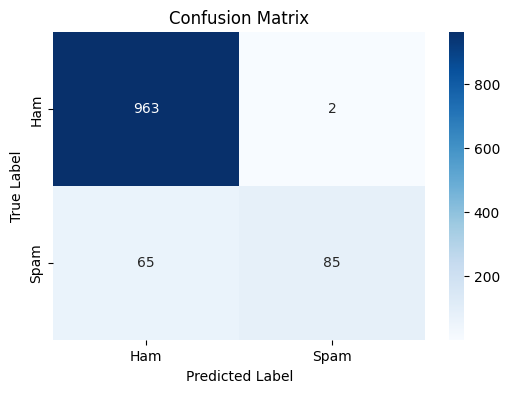


Classification Report:
              precision    recall  f1-score   support

         Ham       0.94      1.00      0.97       965
        Spam       0.98      0.57      0.72       150

    accuracy                           0.94      1115
   macro avg       0.96      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115


--- Testing with New Messages ---

Message: 'Hey, are we still on for the meeting tomorrow at 2pm?'
Predicted Class: ham
Prediction Probability [Ham, Spam]: [0.9758 0.0242]

Message: 'Congratulations! You've won a FREE trip to the Bahamas. Click here to claim your prize NOW!'
Predicted Class: spam
Prediction Probability [Ham, Spam]: [0.1492 0.8508]


In [ ]:
# --- 1. SETUP and DATA LOADING ---
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports for the workflow
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# We'll use a well-known public dataset for this example.
# Download from: https://www.kaggle.com/uciml/sms-spam-collection-dataset
# Let's assume you have it in a file named 'spam.csv'
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please download it from Kaggle.")
    print("Link: https://www.kaggle.com/uciml/sms-spam-collection-dataset")
    exit()

# --- 2. DATA CLEANING and PREPROCESSING ---
# The original dataset has extra columns we don't need. Let's clean it up.
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("--- Initial Data ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

# Let's create a simple preprocessing function
def preprocess_text(text):
    """
    A simple function to clean text data:
    1. Lowercase
    2. Remove punctuation
    """
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Apply the preprocessing to our message column
df['clean_message'] = df['message'].apply(preprocess_text)

print("\n--- Data after Preprocessing ---")
print(df.head())

# --- 3. FEATURE EXTRACTION (VECTORIZATION) ---
# We will convert the clean text messages into TF-IDF vectors.
# TfidfVectorizer will handle tokenization, stop word removal, and TF-IDF calculation.
vectorizer = TfidfVectorizer(stop_words='english')

# X contains the numerical features (TF-IDF vectors)
# y contains the target labels ('ham' or 'spam')
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

print(f"\nShape of our feature matrix (X): {X.shape}")
print(f"This means we have {X.shape[0]} messages and {X.shape[1]} unique words in the vocabulary.")

# --- 4. TRAIN-TEST SPLIT ---
# We split our data to train the model and then test it on unseen data.
# test_size=0.2 means 20% of the data will be for testing.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

# --- 5. MODEL TRAINING ---
# We'll use Logistic Regression, a simple yet powerful classification model.
model = LogisticRegression()

print("\nTraining the model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 6. PREDICTION and EVALUATION ---
print("\n--- Evaluating the Model ---")

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# A) Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} (or {accuracy*100:.2f}%)")

# B) Confusion Matrix
# This tells us where the model made mistakes.
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# For a better visual, let's plot it.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# C) Classification Report (Precision, Recall, F1-Score)
# This gives a detailed breakdown of performance for each class.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# --- 7. TESTING THE MODEL ON NEW MESSAGES ---
print("\n--- Testing with New Messages ---")

def predict_message(message):
    """A helper function to predict the class of a single message."""
    # Preprocess and vectorize the new message
    clean_msg = preprocess_text(message)
    vec_msg = vectorizer.transform([clean_msg])

    # Make a prediction
    prediction = model.predict(vec_msg)
    prediction_proba = model.predict_proba(vec_msg)

    print(f"\nMessage: '{message}'")
    print(f"Predicted Class: {prediction[0]}")
    print(f"Prediction Probability [Ham, Spam]: {prediction_proba[0].round(4)}")

# Test with a message that is clearly ham
predict_message("Hey, are we still on for the meeting tomorrow at 2pm?")

# Test with a message that is clearly spam
predict_message("Congratulations! You've won a FREE trip to the Bahamas. Click here to claim your prize NOW!")

### **Concept 9: Introduction to Word Embeddings & Word2Vec**

Detailed Explanation: Representing Words as Dense Vectors

Introduction to Dense Vectors: Instead of a 50,000-dimensional sparse vector, a word embedding represents each word as a short, dense vector (meaning most of its elements are non-zero).

Typically, these vectors have a length of 50, 100, or 300. Each number in the vector represents a latent feature or aspect of the word's meaning, learned automatically from the data.

Distributed Representations: This is the key idea. A word's meaning is not captured by a single dimension but is distributed across all the dimensions of its vector. The vector as a whole captures the word's position in a high-dimensional "semantic space."

The "You shall know a word by the company it keeps" Principle: This famous quote by J.R. Firth is the philosophical foundation of modern word embeddings.

 Models like Word2Vec learn these dense vectors not by looking at dictionary definitions, but by analyzing the contexts in which words appear in a massive corpus of text (e.g., all of Wikipedia). Words that frequently appear in similar contexts will end up with similar vectors.

Word2Vec (Conceptual Overview): Word2Vec is not one model but a family of two-layer neural network models that produce word embeddings.

It comes in two main flavors:

CBOW (Continuous Bag-of-Words): The goal of the CBOW model is to predict a target word from its surrounding context words. For the sentence "The quick brown fox jumps," you might give the model the context ["The", "quick", "fox", "jumps"] and ask it to predict the middle word brown. It's fast and good for frequent words.


Skip-gram: The goal of the Skip-gram model is the inverse. It tries to predict the surrounding context words given a single target word. You would give the model the word brown and ask it to predict words like ["The", "quick", "fox", "jumps"]. It's generally slower but performs better for rare words and is the more popular of the two.

The Magic of Vector Arithmetic: The most famous result of these learned vector spaces is that they exhibit linear relationships, allowing for vector arithmetic that captures analogies. The classic example is:

vector('king') - vector('man') + vector('woman') ≈ vector('queen')
This demonstrates that the model has learned dimensions corresponding to concepts like royalty and gender without ever being explicitly taught them.

In [ ]:
# use T4 GPU for this example

import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# --- 1. Load a Pre-trained Model from Hugging Face ---
# We'll use 'distilbert-base-uncased', a smaller, faster version of BERT.
# It's a great choice for demonstration.
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

print("Hugging Face model and tokenizer loaded successfully.")

# --- 2. Create a Helper Function to Generate Embeddings ---
def get_embedding(text):
    """
    This function takes a text string and returns its dense vector embedding.
    """
    # Tokenize the text: Convert the string into tokens that the model understands.
    # return_tensors='pt' means we want PyTorch tensors as output.
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Get the model's output. We don't need to train, so we use `torch.no_grad()`.
    with torch.no_grad():
        outputs = model(**inputs)

    # The embeddings are in the `last_hidden_state`.
    # To get a single vector for the entire sentence, we'll take the mean of all token embeddings.
    # This is a common and effective strategy.
    sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

    # Squeeze to remove extra dimensions and convert to a NumPy array for scikit-learn
    return sentence_embedding.numpy()

# --- 3. Demonstrate Semantic Similarity ---
print("\n--- DEMO 1: Semantic Similarity Search ---")
# Our "database" of sentences
corpus = [
    "A dog is playing in the park.",
    "The cat is sleeping on the couch.",
    "Apple announced its new M3 chip for Macbooks.",
    "The latest software update includes performance improvements.",
    "My favorite pet is a golden retriever."
]

# Our search query
query = "Which animal is the best companion?"

# Convert the corpus and query into embeddings
corpus_embeddings = np.array([get_embedding(sentence) for sentence in corpus])
query_embedding = get_embedding(query).reshape(1, -1) # Reshape for compatibility

# Calculate Cosine Similarity between the query and all sentences in the corpus
similarities = cosine_similarity(query_embedding, corpus_embeddings)

print(f"\nQuery: '{query}'")
print("\n--- Similarity Scores ---")
for i, sentence in enumerate(corpus):
    print(f"Similarity with '{sentence}': {similarities[0][i]:.4f}")

# Find the most similar sentence
most_similar_index = np.argmax(similarities)
print(f"\nMost similar sentence in corpus: '{corpus[most_similar_index]}'")


# --- 4. Demonstrate Context-Sensitivity (The Power of Transformers) ---
print("\n--- DEMO 2: The Power of Context ---")
sentence_bank_money = "I need to deposit money at the bank."
sentence_bank_river = "We had a picnic on the river bank."

# We need to look at the token-level embeddings for this demo
def get_token_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # Return the full last_hidden_state and the inputs to map tokens
    return outputs.last_hidden_state.squeeze(), inputs

# Get token embeddings and inputs for both sentences
embeddings_money, inputs_money = get_token_embeddings(sentence_bank_money)
embeddings_river, inputs_river = get_token_embeddings(sentence_bank_river)

# Find the index of the token 'bank' in each sentence
tokens_money = tokenizer.convert_ids_to_tokens(inputs_money['input_ids'][0])
tokens_river = tokenizer.convert_ids_to_tokens(inputs_river['input_ids'][0])
bank_index_money = tokens_money.index('bank')
bank_index_river = tokens_river.index('bank')

# Extract the specific embedding vector for the word 'bank' from each context
bank_vector_money = embeddings_money[bank_index_money]
bank_vector_river = embeddings_river[bank_index_river]

# Compare the two vectors for 'bank'
bank_similarity = cosine_similarity(bank_vector_money.reshape(1, -1), bank_vector_river.reshape(1, -1))

print(f"\nSentence 1: '{sentence_bank_money}'")
print(f"Sentence 2: '{sentence_bank_river}'")
print(f"\nSimilarity between the two vectors for the word 'bank': {bank_similarity[0][0]:.4f}")
print("\nConclusion: The similarity is low because the model created different vectors for 'bank' based on its context!")
print("This is something static embeddings like Word2Vec cannot do.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Hugging Face model and tokenizer loaded successfully.

--- DEMO 1: Semantic Similarity Search ---

Query: 'Which animal is the best companion?'

--- Similarity Scores ---
Similarity with 'A dog is playing in the park.': 0.6851
Similarity with 'The cat is sleeping on the couch.': 0.7004
Similarity with 'Apple announced its new M3 chip for Macbooks.': 0.5598
Similarity with 'The latest software update includes performance improvements.': 0.5832
Similarity with 'My favorite pet is a golden retriever.': 0.7463

Most similar sentence in corpus: 'My favorite pet is a golden retriever.'

--- DEMO 2: The Power of Context ---

Sentence 1: 'I need to deposit money at the bank.'
Sentence 2: 'We had a picnic on the river bank.'

Similarity between the two vectors for the word 'bank': 0.6695

Conclusion: The similarity is low because the model created different vectors for 'bank' based on its context!
This is something static embeddings like Word2Vec cannot do.
